<div style="text-align:right"><i>Peter Norvig<br>Jan 2026</i></div>

# Truncatable Primes

What's special about [this pencil](https://mathsgear.co.uk/products/truncatable-prime-pencil)?

[![](https://community.wolfram.com//c/portal/getImageAttachment?filename=IMG_20181212_120939.jpg&userId=143131)](https://community.wolfram.com/groups/-/m/t/1569707)

The number printed on it is a prime, and as you sharpen the pencil and remove digits one at a time from the left, the resulting numbers are all primes:

    357686312646216567629137 is prime
     57686312646216567629137 is prime
      7686312646216567629137 is prime
                 ...
                         137 is prime
                          37 is prime
                           7 is prime

Numbers like this are called [**truncatable primes**](https://en.wikipedia.org/wiki/Truncatable_prime). I thought I would write a program to find other truncatable primes.

My function `left_truncatable_primes` below starts with the list of one-digit primes: [2, 3, 5, 7]. Then it tries placing each possible digit 1–9 to the left of each of the one-digit primes, giving a list of two-digit candidates.  From the candidates it filters out just the primes  and recursively tries to add digits to them, giving us three-digit primes, then four-digit primes, and so on, stopping when none of the candidates are primes. It gathers up all the truncatable primes and returns them in sorted order.

In [1]:
from sympy import isprime # isprime checks if a number is a prime

def left_truncatable_primes(starting_primes=[2, 3, 5, 7]) -> list[int]:
    """All left-truncatable primes, in ascending order."""
    if not starting_primes:
        return []
    else:
        candidates = [int(d + str(p)) for d in "123456789" for p in starting_primes]
        return starting_primes + left_truncatable_primes(list(filter(isprime, candidates)))

Let's see how many truncatable primes there are:

In [2]:
P = left_truncatable_primes()

len(P)

4260

There are 4260 left-truncatable primes. Here are the smallest and largest ones:

In [3]:
P[:16]

[2, 3, 5, 7, 13, 17, 23, 37, 43, 47, 53, 67, 73, 83, 97, 113]

In [4]:
P[-16:]

[66276812967623946997,
 67986315421273233617,
 86312646216567629137,
 315396334245663786197,
 367986315421273233617,
 666276812967623946997,
 686312646216567629137,
 918918997653319693967,
 5918918997653319693967,
 6686312646216567629137,
 7686312646216567629137,
 9918918997653319693967,
 57686312646216567629137,
 95918918997653319693967,
 96686312646216567629137,
 357686312646216567629137]

Below is the count for each digit-size, with a bar chart. We see there is only one 24-digit left-truncatable prime, the one on the pencil, and that the most common number of digits is 9.


{1: 4,
 2: 11,
 3: 39,
 4: 99,
 5: 192,
 6: 326,
 7: 429,
 8: 521,
 9: 545,
 10: 517,
 11: 448,
 12: 354,
 13: 276,
 14: 212,
 15: 117,
 16: 72,
 17: 42,
 18: 24,
 19: 13,
 20: 6,
 21: 5,
 22: 4,
 23: 3,
 24: 1}

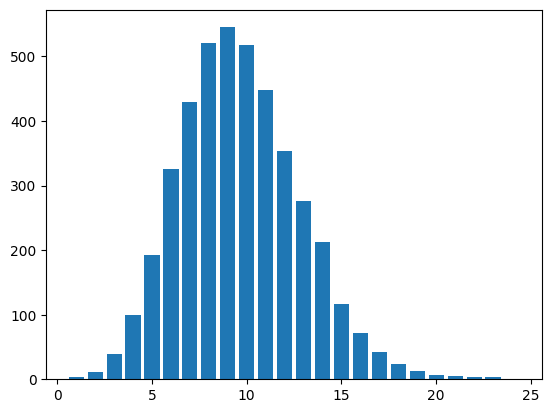

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

digits = Counter(len(str(p)) for p in P)

plt.bar(list(digits), list(digits.values()))
dict(digits)

# Right-Truncatable Primes

What if you sharpen the pencil from the other end? For our 357686312646216567629137 pencil it wouldn't work; removing the "7" from the right results in a composite number. But it is possible to build up the  **right-truncatable** primes:

In [6]:
def right_truncatable_primes(starting_primes=[2, 3, 5, 7]) -> list[int]:
    """All right-truncatable primes, in ascending order."""
    if not starting_primes:
        return []
    else:
        candidates = [10 * p + d for p in starting_primes for d in (1, 3, 7, 9)]
        return starting_primes + right_truncatable_primes(list(filter(isprime, candidates)))

(Note that I only try placing the digits (1, 3, 7, 9) to the right: placing an even digit or a 5 would always result in a composite number. Also, note that I don't have to do string concatenation to form the new candidates; it is simpler to do `10 * p + d`.)

Let's find and count the right-truncatable primes:

In [7]:
Q = right_truncatable_primes()

len(Q)

83

There are only 83 right-truncatable primes, so we might as well see them all:

In [8]:
print(Q)

[2, 3, 5, 7, 23, 29, 31, 37, 53, 59, 71, 73, 79, 233, 239, 293, 311, 313, 317, 373, 379, 593, 599, 719, 733, 739, 797, 2333, 2339, 2393, 2399, 2939, 3119, 3137, 3733, 3739, 3793, 3797, 5939, 7193, 7331, 7333, 7393, 23333, 23339, 23399, 23993, 29399, 31193, 31379, 37337, 37339, 37397, 59393, 59399, 71933, 73331, 73939, 233993, 239933, 293999, 373379, 373393, 593933, 593993, 719333, 739391, 739393, 739397, 739399, 2339933, 2399333, 2939999, 3733799, 5939333, 7393913, 7393931, 7393933, 23399339, 29399999, 37337999, 59393339, 73939133]


Here is the count of digit sizes:

{1: 4, 2: 9, 3: 14, 4: 16, 5: 15, 6: 12, 7: 8, 8: 5}

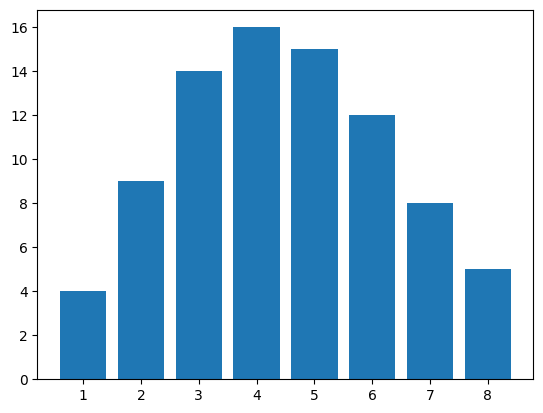

In [9]:
digits = dict(Counter(len(str(p)) for p in Q))

plt.bar(list(digits), list(digits.values()));
digits

# Summary of Truncatable Primes

Here's what we learned:

- Left-trunctable primes:
  - There are 4260 of them
  - The largest has 24 digits: 357686312646216567629137
  - The plurality have 9 digits; few have more than 20 digits
- Right-truncatable primes:
  - There are only 83 of them
  - The largest has 8 digits: 73939133
  - The plurality have 4 digits

# Note on Primality Checking

A prime number can be defined as *"an integer greater than 1 that cannot be evenly divided by any whole number other than 1 and itself."* Here's a naive function to test whether a number is prime:

In [10]:
def isprime_naive(n: int) -> bool:
    """Simple primality checker."""
    divisors = range(2, n)
    return n > 1 and not any(n % d == 0 for d in divisors)

And here's a function to test it. By default we test some easy cases, along with one 8-digit prime and a couple of 8-digit composites.

In [11]:
tests = {True:  [2, 3, 5, 7, 37, 73, 101, 11939, 117223, 73939133],
         False: [0, 1, 4, 6, 8, 9, 10, 256, 123456, 7333*7393, 7393**2]}

def prime_test(predicate, tests=tests) -> None:
    """Test that a primality checking predicate gets the right answers on all the test cases.
    `tests` is a dict of {True: [primes,...], False: [composites,...]}."""
    for result in tests:
        for n in tests[result]:
            assert predicate(n) == result, f'isprime({n}) should be {result}'

In [12]:
%time prime_test(isprime_naive)

CPU times: user 2.1 s, sys: 18.7 ms, total: 2.12 s
Wall time: 2.12 s


We see that `isprime_naive` passes the tests, but it takes 2 seconds, and we're only up to 8-digit numbers. That's too slow!

We can make it faster with two ideas. First, we don't have to check divisors all the way up to *n*. If *p* is composite, then *p* is the product of two numbers, and one of them must be less than or equal to the square root of *n*, so that's as far as we need to go. Second, once we check to see if *n* is divisible by 2, we don't have to check whether it is divisible by any other even number. 

In [13]:
from math import sqrt

def isprime_faster(n: int) -> bool:
    """More sophisticated primality checker: go to square root, checking odd numbers only."""
    if n <= 10:
        return n in (2, 3, 5, 7)
    elif n % 2 == 0:
        return False
    else:
        divisors = range(3, int(sqrt(n)) + 1, 2) # Check odd divisors up to sqrt(n)
        return not any(n % d == 0 for d in divisors)

In [14]:
%time prime_test(isprime_faster)

CPU times: user 405 μs, sys: 1 μs, total: 406 μs
Wall time: 407 μs


We see that this function is roughly a 5,000 times faster than the naive function on our specific test cases. But it would be wrong to conclude that it is always 5,000 times faster; more importantly it is *O*(√*n*) whereas the naive version is *O*(*n*). 

Let's try some tougher test cases, a pair of 16-digit numbers:

In [15]:
test16 = {True: [8637267627626947], False: [73939133**2]}

%time prime_test(isprime_faster, test16)

CPU times: user 2.51 s, sys: 21.2 ms, total: 2.53 s
Wall time: 2.53 s


As expected, `isprime_faster` can handle 16-digit numbers in about the same time `isprime_naive` handles 8-digit numbers. 

What about `sympy.isprime`?

In [16]:
%time prime_test(isprime, test16)

CPU times: user 56 μs, sys: 0 ns, total: 56 μs
Wall time: 57.2 μs


That's about 40,000 times faster than `isprime_faster`! What makes `sympy.isprime` so fast? The answer is: [Number theory](https://en.wikipedia.org/wiki/Number_theory).

The big breakthrough came in 1640, when Pierre de Fermat [showed](https://en.wikipedia.org/wiki/Fermat_primality_test) that if *n* is prime and *a* is not divisible by *n*, then *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*). 

That means we can check if *n* is prime by choosing a random *a* and testing if *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*). If the test is false then *n* is definitely composite. If the test is true, then we're not sure: *n* might be prime, might be composite. But if we repeat the test multiple times with different values of *a*, and they are all true, then that is stronger evidence that *n* is prime. This is called a [Monte Carlo algorithm](https://en.wikipedia.org/wiki/Monte_Carlo_algorithm); an algorithm that uses randomization, and can sometimes be wrong.

Here is an implementation. (The optional third argument to the built-in `pow` function is the modulus.) 

In [17]:
import random

def isprime_fermat(n: int, k=20) -> bool:
    """n is probably a prime if this returns True; definitely composite if it returns False."""
    if n <= 10:
        return n in (2, 3, 5, 7)
    else:
        a_values = (random.randint(2, n - 1) for _ in range(k))
        return any(pow(a, n - 1, n) == 1 for a in a_values)

Let's test it out:

In [18]:
prime_test(isprime_fermat)

%time prime_test(isprime_fermat, test16)

CPU times: user 99 μs, sys: 2 μs, total: 101 μs
Wall time: 102 μs


That's pretty good! Only a few lines of code, it passes the tests, and it is almost as fast as the highly-tuned (and highly complex) `sympy.isprime`. 

The problem is that `isprime_fermat` can lie:

In [19]:
assert 561 == 3 * 11 * 17

isprime_fermat(561)

True

We see that 561 is composite, but `isprime_fermat` claims it is a prime. We can increase the number of samples; that doesn't help:

In [20]:
isprime_fermat(561, k=500)

True

561 is a [Carmichael number](https://en.wikipedia.org/wiki/Carmichael_number), a number that is resistant to the Fermat test.

Fortunately there are variations on Fermat's idea that always give the right answer. `sympy.isprime` ([source code here](https://github.com/sympy/sympy/blob/master/sympy/ntheory/primetest.py)) uses the [Miller-Rabin test](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test) (sometimes called Rabin-Miller, but I give Gary Miller precedence because he is my former colleague). The algorithm is guaranteed to give the right answer, but it does start to get slow for very large numbers.

For numbers greater than 2<sup>64</sup> (20 digits), `sympy.isprime` falls back on the [Baillie–PSW test](https://en.wikipedia.org/wiki/Baillie%E2%80%93PSW_primality_test), which is faster than Miller-Rabin, but is probabilistic. There are no known counterexamples found so far (no equivalent of the Carmichael numbers for the Baillie-PSW test), but no proof that such numbers don't exist.

I hope you have enjoyed this excursion into the land of prime numbers!